<a href="https://colab.research.google.com/github/23032212/STML-2024/blob/main/PranaySai_20303A52212_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Ch.Pranay Sai
Hall&n0 : 2303A52212
Batch NO: 36

In [2]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/train.csv')
print(d)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

TARGET VARIABLE

In [ ]:
y=d['price_range']
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


FEATURES

In [ ]:
x=d.drop('price_range',axis=1)
print(x)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [ ]:
x.isnull().sum()
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[97,  4,  0,  0],
       [ 1, 96,  1,  0],
       [ 0,  2, 98,  5],
       [ 0,  0,  3, 93]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.94      0.98      0.96        98
           2       0.96      0.93      0.95       105
           3       0.95      0.97      0.96        96

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



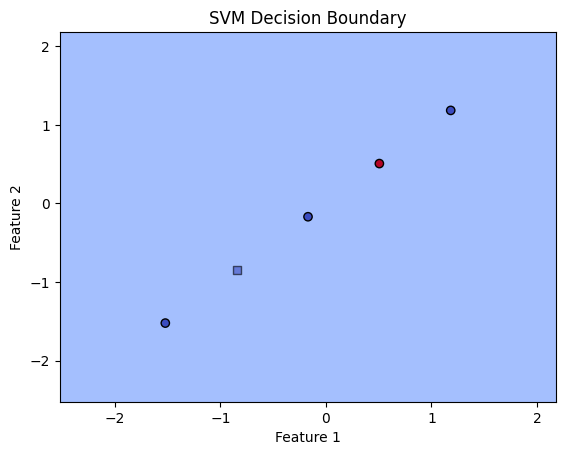

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5,6]])
y = np.array([0, 1, 0, 1, 0])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

h = 0.02
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', marker='s', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.925


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 97,   5,   0,   0],
       [  3,  86,   2,   0],
       [  0,   5,  85,   9],
       [  0,   0,   6, 102]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.90      0.95      0.92        91
           2       0.91      0.86      0.89        99
           3       0.92      0.94      0.93       108

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



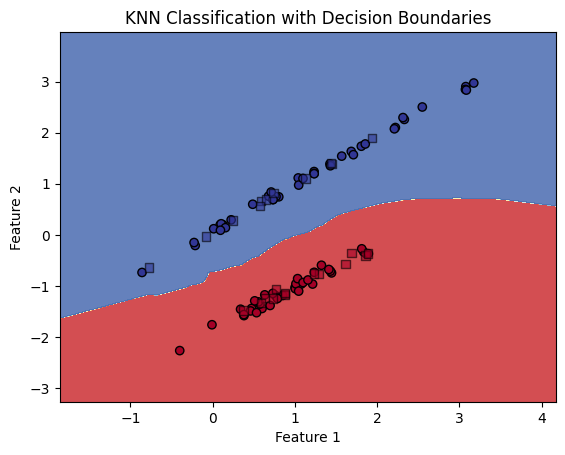

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k', marker='s', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification with Decision Boundaries')
plt.show()

DECISION TREE

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=x.columns, class_names=['0', '1', '2', '3'], filled=True, rounded=True)
plt.show()

Accuracy: 0.0


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1200x800 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 88,  14,   0,   0],
       [ 12,  73,   6,   0],
       [  0,  10,  75,  14],
       [  0,   1,   7, 100]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       103
           1       0.82      0.77      0.79       103
           2       0.74      0.81      0.78        90
           3       0.92      0.87      0.89       104

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



RANDOM FOREST

Accuracy: 0.8725


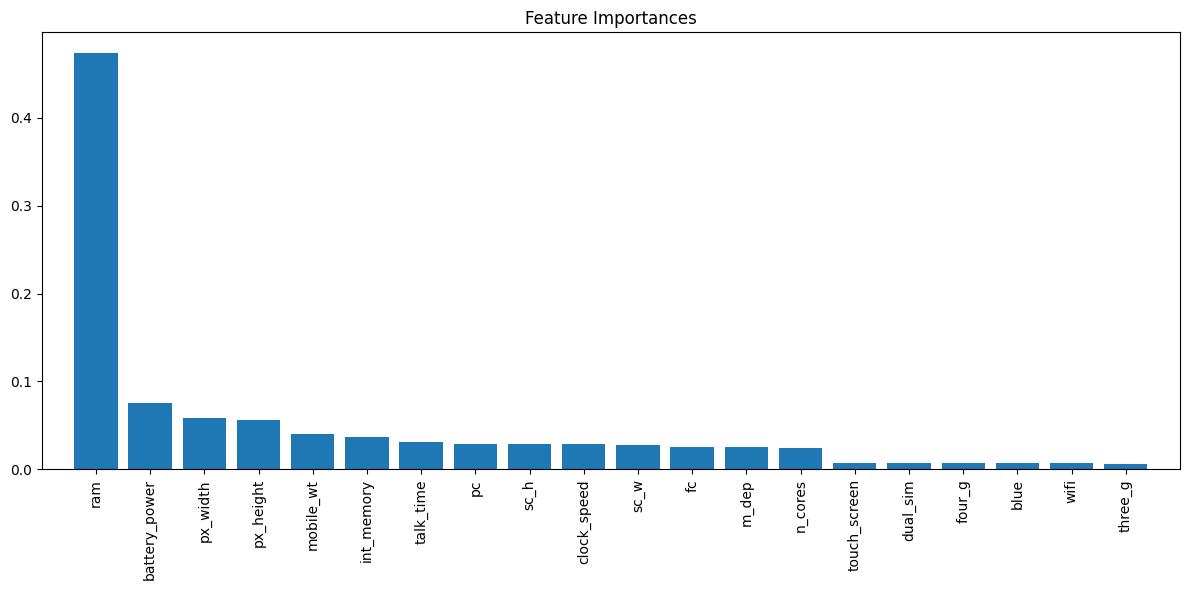

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 88,  14,   0,   0],
       [ 12,  73,   6,   0],
       [  0,  10,  75,  14],
       [  0,   1,   7, 100]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       103
           1       0.82      0.77      0.79       103
           2       0.74      0.81      0.78        90
           3       0.92      0.87      0.89       104

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



K.MEDIOD

Clusters:
[0, 1, 2, 3, 12, 13, 18, 19, 20, 24, 25, 28, 32, 36, 39, 40, 42, 43, 47, 50, 51, 55, 58, 63, 71, 75, 77, 79, 81, 83, 84, 88, 89, 91, 97, 99, 100, 102, 105, 106, 107, 109, 110, 111, 117, 120, 124, 126, 133, 134, 135, 136, 143, 146, 148, 150, 153, 164, 166, 167, 168, 171, 173, 175, 177, 178, 179, 180, 182, 186, 188, 190, 191, 194, 195, 196, 198, 203, 204, 205, 210, 211, 217, 223, 227, 228, 233, 238, 241, 243, 247, 248, 251, 252, 257, 261, 266, 267, 268, 273, 274, 275, 277, 283, 284, 285, 288, 289, 295, 299, 309, 311, 314, 319, 329, 330, 332, 334, 335, 339, 341, 342, 347, 348, 350, 351, 353, 356, 364, 366, 368, 371, 374, 375, 377, 382, 387, 391, 398, 400, 403, 404, 407, 409, 413, 415, 416, 417, 418, 420, 421, 422, 428, 431, 446, 447, 448, 449, 450, 451, 455, 458, 460, 461, 462, 469, 472, 473, 474, 484, 486, 487, 489, 494, 495, 497, 498, 506, 507, 508, 509, 513, 514, 516, 526, 528, 529, 533, 535, 539, 542, 543, 544, 545, 546, 547, 549, 552, 556, 558, 561, 562, 576, 594, 600, 603,

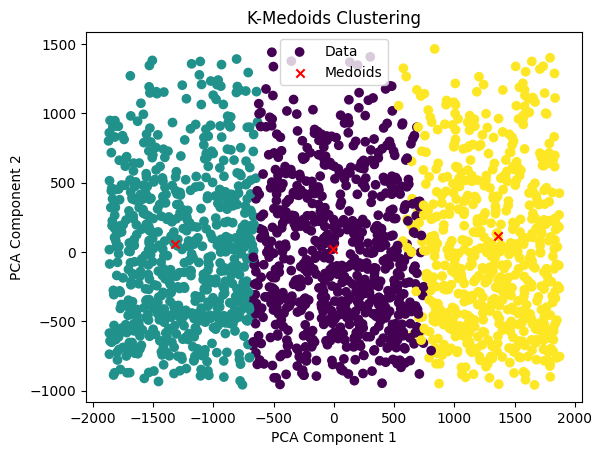

In [ ]:
# Install required libraries (if not done already)
!pip install pyclustering pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
df = pd.read_csv('/content/train.csv')
df = df.select_dtypes(include=[np.number])
df = df.fillna(df.mean())
label_column_name = 'price_range'

if label_column_name in df.columns:
    true_labels = df[label_column_name].values
    df = df.drop(columns=[label_column_name])
else:
    print(f"Warning: Label column '{label_column_name}' not found in the dataset. Evaluation metrics will not be calculated.")
    true_labels = None
data = df.values
k = 3
initial_medoids = np.random.choice(len(data), size=k, replace=False)
kmedoids_instance = kmedoids(data, initial_medoids.tolist())
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print("Clusters:")
for cluster in clusters:
    print(cluster)

print("Medoids (Indices):", medoids)
labels = np.zeros(len(data))
for i, cluster in enumerate(clusters):
    labels[cluster] = i

sil_score = silhouette_score(data, labels)
print(f"Silhouette Score: {sil_score}")
if true_labels is not None:
    ari = adjusted_rand_score(true_labels, labels)
    print(f"Adjusted Rand Index (ARI): {ari}")
    nmi = normalized_mutual_info_score(true_labels, labels)
    print(f"Normalized Mutual Information (NMI): {nmi}")
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', label='Data')
medoid_data = reduced_data[medoids]
plt.scatter(medoid_data[:, 0], medoid_data[:, 1], c='red', marker='x', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
!pip install pyclustering pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, accuracy_score
if true_labels is not None:
    accuracy = accuracy_score(true_labels, labels)
    print(f"Accuracy: {accuracy}")

Accuracy: 0.176


**comparison Table**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
data = pd.read_csv('/content/train.csv')
print(data.columns)
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Accuracy: 0.6325
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
